# Correlação estatística entre dois pontos

### Retângulo 1x1 com pontos uniformemente distribuídos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
path = 'C:/Users/alice/Documents/Unicamp/IC 2018 - 2019/Imagens IC/'
azulQuanta = '#117DF5'
azuldarkQuanta = '#086A99'
laranjaShow = '#FF7F27'

In [2]:
#Criar vetores uniformemente distribuídos
N1 = 1000*2
A = 10
#np.random.seed(12)
x = np.random.random_sample(N1)*A
#np.random.seed(659)
y = np.random.random_sample(N1)*A
np.random.seed()

In [3]:
#Calcula distancia
def calculaDistancia(x,y):
    distancias = []
    for i in range(len(x)):
        j = i+1
        while j<len(x):
            d = ((x[i]-x[j])**2+(y[i]-y[j])**2)**0.5
            distancias.append(d)
            j+=1
    return distancias

In [4]:
#Certifica que foram feitos todas as distâncias, sem repetições
distancias = calculaDistancia(x,y)
print(len(distancias))
print(math.factorial(N1)/(math.factorial(N1-2)*2))

1999000
1999000.0


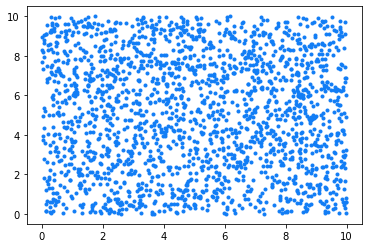

In [5]:
plt.plot(x, y,'.', color = azulQuanta)
plt.savefig(path+'plot_isotropico',ext='png')

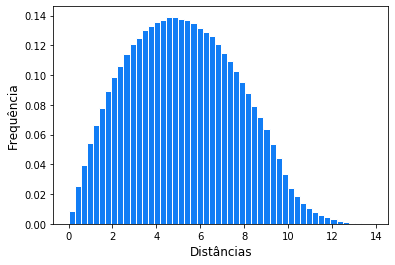

In [6]:
#Fazer histograma
div = 50
plt.hist(distancias, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Distâncias', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao_isotropico', ext='png')
plt.show()

### Retângulo 1x1 com duas fontes de distribuição gaussiana

In [7]:
N2 = 1000
sig = 1
x1_barra = 7
y1_barra = 3
x2_barra = 4
y2_barra = 7
#np.random.seed(1998)
u1 = np.random.random_sample(N2)
#np.random.seed(198)
u2 = np.random.random_sample(N2)

#np.random.seed(917)
u3 = np.random.random_sample(N2)
#np.random.seed(1214)
u4 = np.random.random_sample(N2)

distMedias = ((x1_barra-x2_barra)**2+(y1_barra-y2_barra)**2)**0.5
print(distMedias)

5.0


In [8]:
theta1 = 2*np.pi*u1
r1 = np.sqrt(-2*sig**2*np.log(1-u2))

theta2 = 2*np.pi*u3
r2 = np.sqrt(-2*sig**2*np.log(1-u4))

In [9]:
x1 = r1*np.cos(theta1) + x1_barra
y1 = r1*np.sin(theta1) + y1_barra

x2 = r2*np.cos(theta2) + x2_barra
y2 = r2*np.sin(theta2) + y2_barra

x_unico = []
for i in range(len(x1)):
    x_unico.append(x1[i])
    x_unico.append(x2[i])
    
y_unico = []
for i in range(len(y1)):
    y_unico.append(y1[i])
    y_unico.append(y2[i])

In [10]:
distanciasGaussianas = calculaDistancia(x_unico, y_unico)

In [11]:
print(len(distanciasGaussianas))
print(math.factorial(N2*2)/(math.factorial(N2*2-2)*2))

1999000
1999000.0


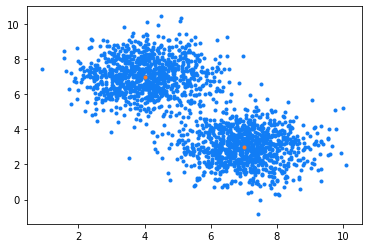

In [12]:
plt.plot(x_unico, y_unico,'.', color = azulQuanta)
plt.plot(x1_barra,y1_barra, '.',color=laranjaShow)
plt.plot(x2_barra,y2_barra, '.',color=laranjaShow)
plt.savefig(path+'plot_gaussiana2d', ext='png')

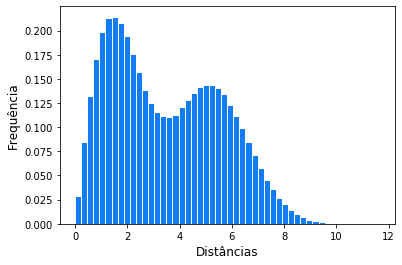

In [13]:
#Fazer histograma
div = 50
plt.hist(distanciasGaussianas, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Distâncias', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao_gaussiana', ext='png')
plt.show()

### Retângulo 1x1 com duas fontes de distribuição gaussiana e uma fonte isotrópica

In [14]:
x_total = x_unico
for i in range(len(x)):
    x_total.append(x[i])
    
y_total = y_unico
for i in range(len(y)):
    y_total.append(y[i])

In [15]:
distanciasTotal = calculaDistancia(x_total, y_total)

In [16]:
print(len(distanciasTotal))
print(math.factorial(len(x_total))/(math.factorial(len(x_total)-2)*2))

7998000
7998000.0


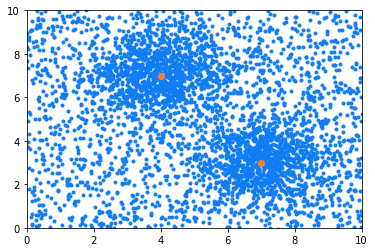

In [17]:
plt.plot(x_total, y_total,'.', color = azulQuanta)
plt.plot(x1_barra,y1_barra, 'o',color=laranjaShow)
plt.plot(x2_barra,y2_barra, 'o',color=laranjaShow)
plt.xlim(0,10)
plt.ylim(0,10)
plt.savefig(path+'plot Gaussiana e Isotropico 2d', ext='png')
plt.show()

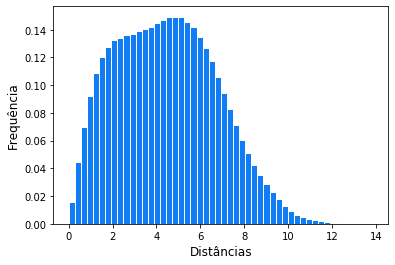

In [18]:
#Fazer histograma
div = 50
plt.hist(distanciasTotal, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Distâncias', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao Gaussiana e Isotropico', ext='png')
plt.show()

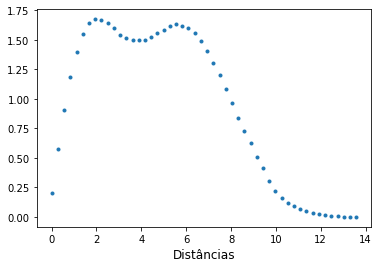

In [19]:
y_iso, x_iso = np.histogram(distancias, bins = div)
x_iso = x_iso[0:-1]
y_gauss, x_gauss = np.histogram(distanciasGaussianas, bins = div)
x_gauss = x_gauss[0:-1]
y_test = y_iso/y_iso.max()+y_gauss/y_gauss.max()

plt.plot(x_iso, y_test, '.')
plt.xlabel('Distâncias', fontsize = 12)
plt.savefig(path+'correlacao_soma', ext='png')
plt.show()


### Distâncias entre direções segundo uma distribuição isotrópica

In [20]:
N3 = 100
#np.random.seed(701)
u = np.random.random_sample(N3)
v = np.random.random_sample(N3)
np.random.seed()

In [21]:
phi = ((2.*np.pi) * u)
theta = (np.arccos(2.*v-1.))
# Cria phi e theta, ambos em graus
phi_graus = np.degrees(phi)
theta_graus = np.degrees(theta)

print(min(phi)*180/np.pi)

2.3393314713478257


In [22]:
def distanciaCosseno(theta, phi):
    distancias = []
    x = np.sin(theta)*np.cos(phi)
    y = np.sin(theta)*np.sin(phi)
    z = np.cos(theta)
    for i in range(len(theta)):
        j = i+1
        while j<len(theta):
            d = x[i]*x[j]+y[i]*y[j]+z[i]*z[j]
            distancias.append(d)
            j+=1
    return distancias
    

In [23]:
distanciasDirecoes = distanciaCosseno(theta,phi)
angulosDirecoes = np.degrees(np.arccos(distanciasDirecoes))
#print(angulosDirecoes)

In [24]:
print(len(distanciasDirecoes))
print(math.factorial(len(phi))/(math.factorial(len(phi)-2)*2))

4950
4950.0


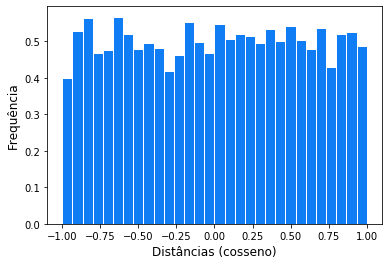

In [25]:
#Fazer histograma de direções isotrópicas
div = 30
plt.hist(distanciasDirecoes, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Distâncias (cosseno)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao direções cosseno', ext='png')
plt.show()

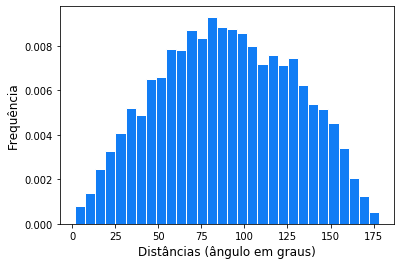

In [26]:
#Fazer histograma de direções isotrópicas
div = 30
plt.hist(angulosDirecoes, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel('Distâncias (ângulo em graus)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao direções ângulo', ext='png')
plt.show()

### Com exposição

In [27]:
# Parametros
a0 = np.radians(-35.2)
theta_m = np.radians(60)
x_inicial = np.radians(-90)
x_final = np.radians(90)

In [28]:
#Criar vetores uniformemente distribuídos
N4 = 10000
#np.random.seed(192)
u = np.random.random_sample(N4)
#np.random.seed(96)
v = np.random.random_sample(N4)
#np.random.seed(3)
w = np.random.random_sample(N4)
np.random.seed()

In [29]:
#Associar phi e theta a u e v
phiEx_rad = 2. * np.pi * v 
thetaEx_rad = np.arccos(((2. * u) - 1.))

#Relacionar alpha e delta (coordenadas equatoriais) com phi e theta 
#alpha = phi
alpha_rad = phiEx_rad
#delta = theta - pi/2
delta_rad = thetaEx_rad - (np.pi / 2.)

In [30]:
#Calcula exposicao
omega = np.zeros(len(delta_rad))
for i in range(len(delta_rad)):
    psi = (np.cos(theta_m) - (np.sin(a0) * np.sin(delta_rad[i])))/(np.cos(a0) * np.cos(delta_rad[i]))
    if (psi > 1):
        alfa_m = 0
    elif (psi < (-1)):
        alfa_m = np.pi
    else:
        alfa_m = np.arccos(psi)

    omega[i] = ((np.cos(a0) * np.cos(delta_rad[i]) * np.sin(alfa_m)) + (alfa_m * np.sin(a0) * np.sin(delta_rad[i])))

In [31]:
# Normaliza o omega
omega_max = max(omega)
omega_relativo = omega/omega_max

In [32]:
# Aplica filtro e seleciona o delta referente
delta_in = []
alpha_in = []
for i in range(len(w)):
    if w[i] < omega_relativo[i]:
        delta_in.append(delta_rad[i])
        alpha_in.append(alpha_rad[i])

In [33]:
phiEx_in = []
thetaEx_in = []

for i in range(len(alpha_in)):
    phiEx_in.append(alpha_in[i])
    #delta = theta - pi/2
    thetaEx_in.append(delta_in[i] + (np.pi / 2.))

phiEx_in = phiEx_in[0:1119]
thetaEx_in = thetaEx_in[0:1119]

In [34]:
distanciasDirecoesEx = distanciaCosseno(thetaEx_in, phiEx_in)
angulosDirecoesEx = np.degrees(np.arccos(distanciasDirecoesEx))
#print(angulosDirecoes)

In [35]:
print(len(distanciasDirecoesEx))
print(math.factorial(len(thetaEx_in))/(math.factorial(len(thetaEx_in)-2)*2))

625521
625521.0


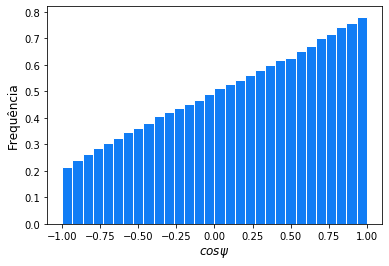

In [36]:
#Fazer histograma dos cossenos dos angulos
div = 30
plt.hist(distanciasDirecoesEx, bins = div, density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel(r'$cos\psi$', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao exposição', ext='png')
plt.show()

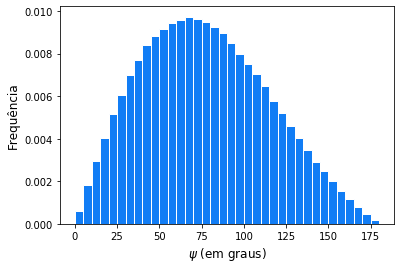

In [37]:
#Fazer histograma dos angulos
div = 30
plt.hist(angulosDirecoesEx, bins = np.arange(0,185,5), density=True, edgecolor='white',facecolor=azulQuanta)
plt.xlabel(r'$\psi$ (em graus)', fontsize = 12)
plt.ylabel('Frequência', fontsize = 12)
plt.savefig(path+'correlacao exposição ângulo', ext='png')
plt.show()